In [3]:
#다나와 크롤링 결과 가져오기
import pandas as pd

data = pd.read_excel("data4/danawa_crawling_result.xlsx")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   성능목록    410 non-null    object
 2   가격      440 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.4+ KB


,상품명,성능목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1203710
1,WJTluUC3Kx,WJTluUC3Kx685978,685978
2,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",50080
3,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",36230
4,LG전자 코드제로 A9 A9100S,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,462570


In [4]:
#상품명 10개 가져오기
data['상품명'][:10]

0     LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571
1                            WJTluUC3Kx
2    샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)
3          샤오미 미지아 차량용 핸디 무선 청소기 (해외구매)
4                   LG전자 코드제로 A9 A9100S
5                           샤오미 드리미 V10
6                                   NaN
7                 삼성전자 제트 VS20T9278S3CS
8             LG전자 코드제로 ThinQ A9S A9700
9      샤오미 LYDSTO 핸디형 에어펌프 진공청소기 (해외구매)
Name: 상품명, dtype: object

In [234]:
#회사명과 모델명을 공백으로 구분 - split 사용 복습
title = '샤오미 드리미 V10'
info = title.split(" ", 1)#첫 번째 공백에 대해서만 구분
info

['샤오미', '드리미 V10']

In [265]:
#회사명과 모델명 분리
company_list = []
product_list = []
price_list = []
for index, title in enumerate(data['상품명']): #enumerate : value와 index 저장
    try:
        title_info = title.split(' ', 1)
        company_name = title_info[0]
        product_name = title_info[1]
#        print(title_info) #분리된 title
        company_list.append(company_name)
        product_list.append(product_name)
        price_list.append(data['가격'][index])#가격의 인덱스를 바로 뽑기
        
    except:
        continue
        
print(len(data))
print(len(company_list))
print(len(price_list))

440
400
400


In [266]:
#스펙목록 정리
data['성능목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸이클론 / 스마트인버터모터 / 흡입력: 210W / 소비전력: 590W / [배터리] 분리형 / 리튬이온 (2개) / 전압: 25.2V / 충전시간: 4시간 / 사용시간: 1시간(개당) / [필터] 헤파필터 / 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / WiFi / [구성품] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 알레르기인증(BAF) / 미세먼지인증(SLG) / 색상: 카밍베이지 / 무게: 2.6kg / 먼지통자동비움 / 크기(가로x세로x깊이): 250x1120x260mm'

In [267]:
#첫 번쨰 제품의 스펙목록 분리
spec_list = data['성능목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입+걸레겸용',
 '[성능] 2중터보싸이클론',
 '스마트인버터모터',
 '흡입력: 210W',
 '소비전력: 590W',
 '[배터리] 분리형',
 '리튬이온 (2개)',
 '전압: 25.2V',
 '충전시간: 4시간',
 '사용시간: 1시간(개당)',
 '[필터] 헤파필터',
 '5단계여과',
 '[기능] 자동물공급',
 '디스플레이표시창',
 '배터리잔량표시',
 'WiFi',
 '[구성품] 바닥',
 '물걸레',
 '침구',
 '솔형',
 '틈새',
 '올인원타워',
 '[부가] 알레르기인증(BAF)',
 '미세먼지인증(SLG)',
 '색상: 카밍베이지',
 '무게: 2.6kg',
 '먼지통자동비움',
 '크기(가로x세로x깊이): 250x1120x260mm']

In [268]:
#카테고리 정보 추출
category = spec_list[0]
category

'핸디/스틱청소기'

In [269]:
#사용시간, 흡입력이 포함된 원소추출
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec

print(use_time_spec)
print(suction_spec)

사용시간: 1시간(개당)
흡입력: 210W


In [270]:
#정량적인 수치 추출
use_time_value = use_time_spec.split(' ')[1].strip()
suction_value = suction_spec.split(' ')[1].strip()
print(use_time_value)
print(suction_value)

1시간(개당)
210W


In [271]:
#카테고리, 사용시간, 흡입력 추출 
category_list = []
use_time_list = []
suction_list = []
for spec_data in data['성능목록']:
    #오류 잡기
    try:
        # ' / ' 기준으로 스펙 분리하기 
        spec_list = spec_data.split(' / ')
        
        if len(spec_list) > 1:
            # 카테고리 추출하기
            category = spec_list[0]
            category_list.append(category)

            # 사용시간, 흡입력 추출 
            # 사용시간, 흡입력 정보가 없는 제품을 위해 변수를 생성 
            use_time_value = None
            suction_value = None

            # spec_list의 각 원소에서 사용시간, 흡입력 수치 추출
            for spec in spec_list:
                if '사용시간' in spec:
                    use_time_value = spec.split(' ')[1].strip()
                if '흡입력' in spec:
                    suction_value = spec.split(' ')[1].strip()

            use_time_list.append(use_time_value)
            suction_list.append(suction_value)
        
    except:
        continue

In [272]:
#카테고리, 사용시간, 흡입력에 대한 전처리 결과 확인
print('카테고리', len(category_list), category_list[0:5])
print('사용시간', len(use_time_list), use_time_list[0:5])
print('흡입력', len(suction_list), suction_list[0:5])

카테고리 400 ['핸디/스틱청소기', '차량용청소기', '차량용청소기', '핸디/스틱청소기', '핸디/스틱청소기']
사용시간 400 ['1시간(개당)', '25분', '9~30분', '40분(개당)', '1시간(개당)']
흡입력 400 ['210W', '16,800Pa', '13,000Pa', None, '22000Pa']


In [273]:
print(category_list)

['핸디/스틱청소기', '차량용청소기', '차량용청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '로봇청소기', '핸디/스틱청소기', '차량용청소기', '차량용청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기', '욕실청소기', '물걸레청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기', '물걸레청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '로봇청소기', '핸디/스틱청소기', '핸디/스틱청소기', '물걸레청소기', '핸디/스틱청소기', '핸디/스틱청소기', '침구청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '욕실청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '물걸레청소기', '핸디/스틱청소기', '물걸레청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기', '물걸레청소기', '물걸레청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '물걸레청소기', '핸

In [274]:
print(use_time_list)

['1시간(개당)', '25분', '9~30분', '40분(개당)', '1시간(개당)', '1시간(개당)', '1시간(개당)', '15~30분', '1시간(개당)', '1시간(개당)', '45분(개당)', '60분(개당)', '40분(개당)', '3시간(개당)', '20분(개당)', '30분', '17분', '1시간(개당)', '15~28분', '42분(개당)', '1시간40분(개당)', '30분(개당)', '1시간(개당)', '50분(개당)', '1시간(개당)', '1시간(개당)', '1시간30분(개당)', '1시간(개당)', '1시간(개당)', '50분(개당)', '1시간(개당)', '1시간(개당)', '1시간(개당)', '53분(개당)', '30분', '1시간(개당)', '50분(개당)', '1시간(개당)', '40분(개당)', '1시간(개당)', '3시간(개당)', '1시간(개당)', '1시간(개당)', '30분(개당)', '10분(개당)', '1시간(개당)', '25분(개당)', '30분(개당)', '45분(개당)', '40분(개당)', '35분(개당)', '1시간(개당)', '50분(개당)', '1시간(개당)', '53분(개당)', '20분(개당)', '1시간(개당)', '1시간(개당)', '1시간(개당)', '1시간(개당)', '50분(개당)', '1시간(개당)', '24분(개당)', '50분(개당)', '50분(개당)', '1시간(개당)', '20분(개당)', '1시간20분(개당)', '1시간(개당)', '30분(개당)', '45분(개당)', '40분(개당)', '20분(개당)', '30분(개당)', '1시간(개당)', '50분(개당)', '12분(고속),25분(저속)', '1시간(개당)', '4시간(개당)', '30분(개당)', '1시간(개당)', '1시간(개당)', '1시간(개당)', '50분(개당)', '1시간(개당)', '30분(개당)', '30분(개당)', '28분(개당)', '40분(개당)', '1시간(개당)', '20분', '20분(

In [275]:
#사용시간을 분 단위로 조정하는 함수
def convert_time_minute(time):
    try:
        #'~' 있을때
        if '~' in time:
            hour_m = time.split('~')[0] #'~' 앞의 숫자 가져오기
                                        #ex) 1시간20분~2시간 -> 앞의 것(1시간20분)만 가져오기
            
            # 앞의 숫자에'시간'이 있는 경우
            if '시간' in hour_m:
                hour = hour_m.split('시간')[0] #'시간' 앞의 숫자 가져오기
                
                #앞의 숫자에 '분'이 있는 경우
                if '분' in hour_m:
                    minute = hour_m.split('시간')[-1].split('분')[0]
                    
                    #'분'에 '~'가 있는 경우
                    if '~' in minute:
                        minute = minute.split('~')[1]

                #앞의 숫자에 시간만 있고, '분'이 없는 경우
                else:
                    minute = 0
                
            else:
                #'시간'이 없고 '분'만 있는 경우
                hour = 0
                minute = hour_m.split('분')[0]
                
                if '~' in minute:
                    minute = minute.split('~')[1].strip()

        
        #'~' 없을때
        else:
            if '시간' in time:
                hour = time.split('시간')[0]
                if '분' in time:
                    minute = time.split('시간')[-1].split('분')[0]
#                     if '~' in minute:
#                         minute = minute.split('~')[1]
                else:
                    minute = 0

            else:
                hour = 0
                minute = time.split('분')[0]
#                 if '~' in minute:
#                     minute = minute.split('~')[1]

        return int(hour) * 60 + int(minute) #문자열인 '시간'을 숫자형(분 형태)으로 변환 후, 
                                             #기존 문자열 '분'을 숫자형으로 변환해 더함
    except Exception as e:
        print(e)

In [276]:
#사용시간을 분 단위로 조정하는 함수의 테스트
times = ['40분(개당)', '4분', '1시간30분(개당)', '9~10분', '1시간9~10분', '1시간30분~2시간', None]
for time in times:
    time_value = convert_time_minute(time)
    print(time, '=', time_value)

40분(개당) = 40
4분 = 4
1시간30분(개당) = 90
9~10분 = 9
1시간9~10분 = 60
1시간30분~2시간 = 90
argument of type 'NoneType' is not iterable
None = None


In [277]:
new_use_time_list = []
for time in use_time_list:
    time_value = convert_time_minute(time)
    new_use_time_list.append(time_value)

print(len(new_use_time_list))    
print(new_use_time_list[:10])

argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
invalid literal for int() with base 10: '사용'
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is 

In [278]:
#흡입력이 pa, w, aw단위로 혼재되어 있다
suction_list[:10]

['210W',
 '16,800Pa',
 '13,000Pa',
 None,
 '22000Pa',
 '200W',
 '200W',
 '10,000Pa',
 '200W',
 '210W']

In [279]:
#흡입력 단위를 통일시키는 함수
def get_suction(value):
    try:
        value = value.upper()
        
        #AW, W형 값이 있다면
        if 'AW' in value or 'W' in value: 
            result = value.replace("A", "").replace("W", "") #'A'와 'W' 삭제
            result = int(result.replace(",","")) #','가 있으면 빈공간으로 replace
        
        #PA형 값이 있다면
        elif 'PA' in value:
            result = value.replace("PA","") #'PA' 삭제
            result = int(result.replace(",",""))/100 #','가 있으면 빈공간으로 replace 후, 100으로 나눔
        
        #그 외의 값
        else:
            result = None
            
        return result
    
    except Exception as er:
        print(er)
        return None

In [280]:
#흡입력 단위 통일시키는 함수 테스트 코드
suction = ['100W','10AW',"10,000Pa"]
for power in suction:
    value = get_suction(power)
    print(power, "=", value)

100W = 100
10AW = 10
10,000Pa = 100.0


In [281]:
#흡입력 단위 통일시키기
new_suction_list = []
for power in suction_list:
    value = get_suction (power)
    new_suction_list.append(value)
     
print(len(new_suction_list))
print(new_suction_list[:10])

'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' 

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   성능목록    410 non-null    object
 2   가격      440 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.4+ KB


In [283]:
print(len(company_list))
print(len(category_list))
print(len(product_list))
print(len(price_list)) #가격을 다른 데이터와 같은 인덱스 값으로 가져온다
print(len(new_use_time_list))
print(len(suction_list))

400
400
400
400
400
400


In [284]:
#전처리 데이터 확인
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = price_list
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1203710,60.0,210.0
1,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 3세대 (해외구매),50080,25.0,168.0
2,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기 (해외구매),36230,9.0,130.0
3,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,462570,40.0,NaN
4,핸디/스틱청소기,샤오미,드리미 V10,156320,60.0,220.0


In [285]:
#카테고리 분류 기준 및 데이터 개수 점검
pd_data['카테고리'].value_counts()

핸디/스틱청소기          295
차량용청소기             41
물걸레청소기             36
침구청소기              11
욕실청소기               9
로봇청소기               3
업소용청소기              3
진공청소기               1
핸디/스틱청소기+로봇청소기      1
Name: 카테고리, dtype: int64

In [286]:
#핸디/스틱 청소기만 선택
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)

295

In [287]:
pd_data_final['카테고리'].value_counts()

핸디/스틱청소기    295
Name: 카테고리, dtype: int64

In [288]:
#엑셀로 저장
pd_data_final.to_excel('data4/danawa_data_final.xlsx', index = False)

###  무선청소기 모델별 비교분석

In [289]:
#데이터 불러오기
danawa_data = pd.read_excel('data4/danawa_data_final.xlsx')
danawa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    295 non-null    object 
 1   회사명     295 non-null    object 
 2   제품      295 non-null    object 
 3   가격      295 non-null    int64  
 4   사용시간    281 non-null    float64
 5   흡입력     177 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.0+ KB


In [290]:
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1203710,60.0,210.0
1,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,462570,40.0,NaN
2,핸디/스틱청소기,샤오미,드리미 V10,156320,60.0,220.0
3,핸디/스틱청소기,삼성전자,제트 VS20T9278S3CS,634940,60.0,200.0
4,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9700,875390,60.0,200.0


In [291]:
#흡입력 기준정렬
top_list = danawa_data.sort_values(['사용시간'], ascending= False) #내림차순 정렬
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
119,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250.0
165,핸디/스틱청소기,로보락,H6,439000,90.0,250.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
257,핸디/스틱청소기,도노,SY-306,179000,80.0,220.0


In [292]:
#사용시간 기준정렬
top_list = danawa_data.sort_values(['사용시간'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
119,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250.0
165,핸디/스틱청소기,로보락,H6,439000,90.0,250.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
257,핸디/스틱청소기,도노,SY-306,179000,80.0,220.0


In [293]:
#사용시간, 흡입력을 기준으로 정렬
#사용시간 & 흡립력 Top 리스트
top_list = danawa_data.sort_values(['사용시간', '흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
119,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250.0
165,핸디/스틱청소기,로보락,H6,439000,90.0,250.0
257,핸디/스틱청소기,도노,SY-306,179000,80.0,220.0


In [294]:
#평균값 정리
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print('가격 평균값 :', price_mean_value)
print('흡입력 평균값 :', suction_mean_value)
print('사용시간 평균값 :', use_time_mean_value)

가격 평균값 : 381915.0779661017
흡입력 평균값 : 175.28813559322035
사용시간 평균값 : 42.754448398576514


In [295]:
#평균을 이용해 가성비 좋은 제품 탐색
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['흡입력'] >= suction_mean_value) &
    (danawa_data['사용시간'] >= use_time_mean_value)
]

condition_data.head(10)

,카테고리,회사명,제품,가격,사용시간,흡입력
2,핸디/스틱청소기,샤오미,드리미 V10,156320,60.0,220.0
8,핸디/스틱청소기,샤오미,드리미 V9,108760,60.0,200.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
30,핸디/스틱청소기,샤오미,로이드미 Z1,268000,60.0,220.0
39,핸디/스틱청소기,샤오미,드리미 V10 ARES,205760,60.0,220.0
50,핸디/스틱청소기,샤오미,SHUNZAO Z11,145100,60.0,260.0
59,핸디/스틱청소기,샤오미,드리미 V10P,224900,60.0,220.0
60,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,232990,60.0,260.0
82,핸디/스틱청소기,샤오미,로이드미 제로,216380,60.0,220.0
90,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220.0


### 데이터 시각화

In [296]:
#결측값 제거
chart_data = danawa_data.dropna(axis = 0) #하나라도 값이 없는 행은 제거해주겠다
len(chart_data)

173

In [297]:
#흡입력, 사용시간 최대, 최소
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

In [298]:
#라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 
# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우, macOS에 대해 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')

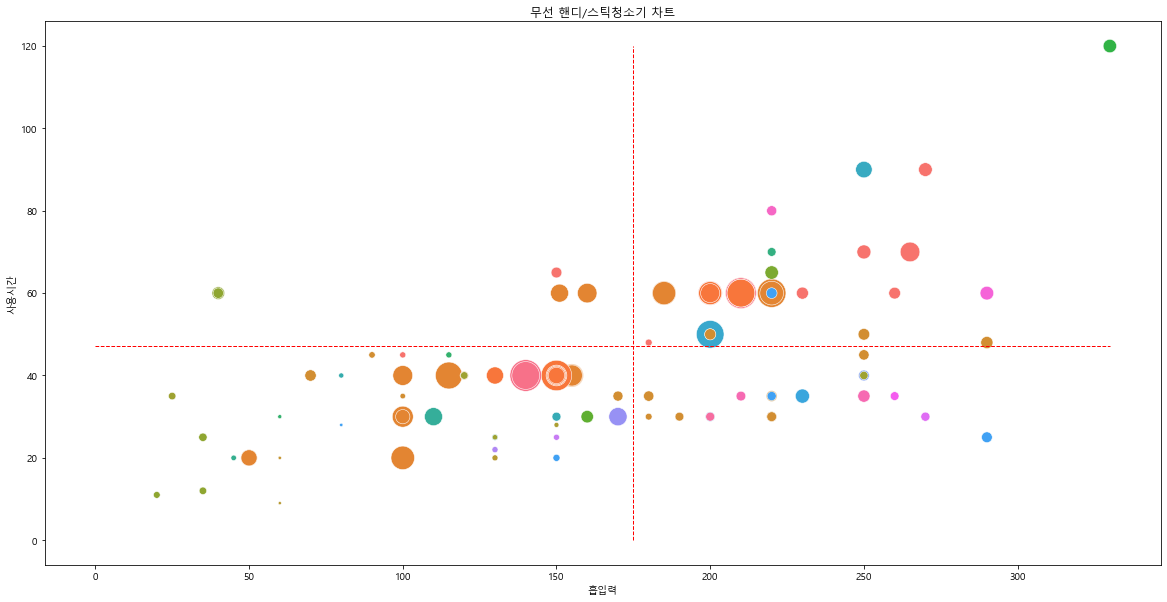

In [303]:
#청소기 성능 시각화
plt.figure(figsize = (20, 10))
plt.title("무선 핸디/스틱청소기 차트")

sns.scatterplot(x = "흡입력", y = "사용시간", size = "가격", hue = chart_data['회사명'],
                data = chart_data, sizes = (10, 1000), legend = False) #size : 원 크기, sizes : 10 ~ 1000사이의 값으로 표시, legend : 범례

#기준선 - 평균값
#사용시간 평균선
plt.plot([0, suction_max_value], #0부터 Max 값 위치까지 그리겠다 (보여지는 위치도 달라짐)
         [use_time_mean_value, use_time_mean_value], #직선으로 그리겠다
         'r--', #'r--' : 선 색상
          lw = 1 #lw : 선의 종류
        )

#흡입력 평균선
plt.plot([suction_mean_value, suction_mean_value], #직선으로 그리겠다
          [0, use_time_max_value], #0부터 Max 값 위치까지 그리겠다 (보여지는 위치도 달라짐)
          'r--', 
          lw = 1 ) 

plt.show()

In [304]:
#인기 제품 선택
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

In [317]:
# 흡입력, 사용시간의 최댓값, 최솟값 구하기
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

print("흡입력 max",suction_max_value)
print("흡입력 mean",suction_mean_value)
print("사용시간 max",use_time_max_value)
print("사용시간 mean",use_time_mean_value)

흡입력 max 270.0
흡입력 mean 194.8
사용시간 max 90.0
사용시간 mean 59.5


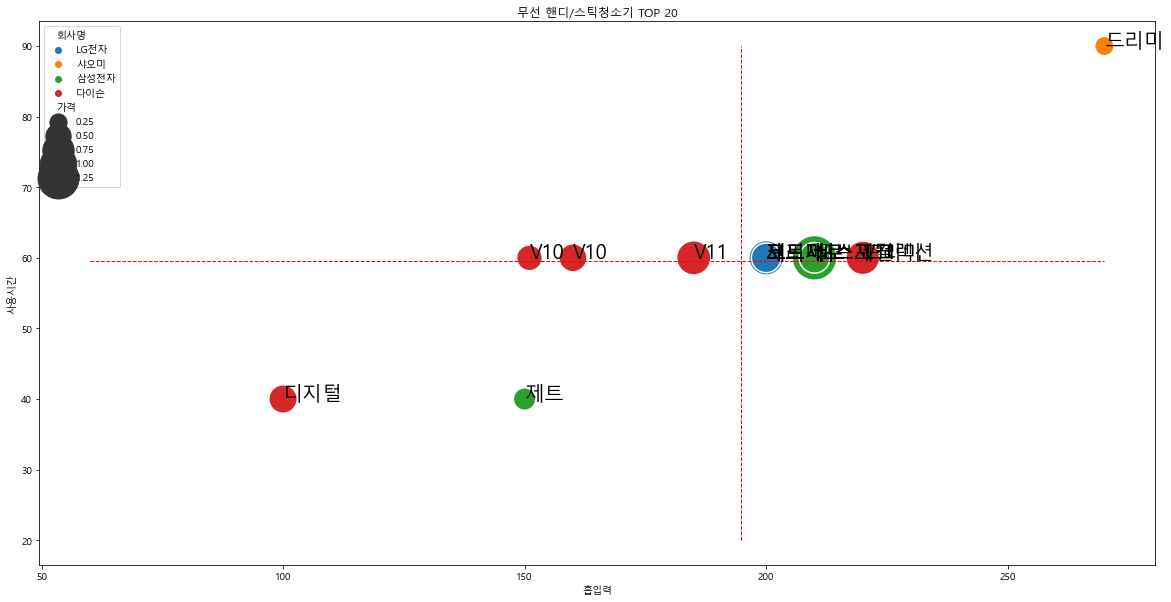

In [329]:
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")

sns.scatterplot(x = '흡입력', 
                y = '사용시간', 
                size = '가격', 
                hue = chart_data_selected['회사명'], 
                data = chart_data_selected, sizes = (100, 2000))

#사용시간 평균값
plt.plot([60, suction_max_value], 
         [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1)

#흡입력 평균값
plt.plot([suction_mean_value, suction_mean_value], 
         [20, use_time_max_value], 
         'r--', 
         lw = 1)

for index, row in chart_data_selected.iterrows(): #iterrows() : 한 행의 값을 하나씩 가져옴
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0] #제품 앞의 값만 가져옴 (기니까)
    plt.text(x, y, s, size=20)
    
plt.show()